# EDA du fichier horaire travail

Ce notebook a pour objectif d'analyser les données d'horaires de travail collectées 
via les badgeuses de l'entreprise HumanForYou sur l'année 2015. 

L'analyse se concentre sur :
- L'extraction et le chargement des données
- L'identification des valeurs manquantes
- La visualisation des patterns de données incomplètes
- L'évaluation de la qualité des données pour la modélisation

Pour pouvoir mener à bien cette analyse, nous allons devoir effectuer des imports 
de différentes bibliothèques Python essentielles :
- pandas : pour la manipulation et l'analyse des données tabulaires
- numpy : pour les calculs numériques et la gestion des valeurs manquantes
- matplotlib & seaborn : pour la création de visualisations graphiques
- zipfile & os : pour la gestion et l'extraction des fichiers compressés
- datetime : pour le traitement des données temporelles

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import tarfile
import zipfile
import os
from datetime import datetime

# Configuring display settings
plt.rcParams['figure.figsize'] = (12, 9)
sns.set()
sns.set_context('talk')
np.set_printoptions(threshold=20, precision=2, suppress=True)
pd.set_option('display.max_rows', 30)
pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 2)
pd.set_option('display.float_format', '{:.2f}'.format)
warnings.filterwarnings("ignore", category=FutureWarning)

# Extraction des données du fichier zip

Le fichier in_out_time.zip contient les données de badgeuse pour l'ensemble des 
employés sur l'année 2015. Nous devons d'abord extraire le contenu de cette archive 
compressée pour accéder aux fichiers CSV qu'elle contient.

Cette étape permet de :
- Créer un dossier dédié pour les fichiers extraits
- Décompresser l'archive ZIP de manière programmatique
- Lister les fichiers disponibles pour l'analyse

In [2]:
zip_path = 'Data/in_out_time.zip'
extract_folder = 'in_out_time_data'

# Créer le dossier d'extraction s'il n'existe pas
if not os.path.exists(extract_folder):
    os.makedirs(extract_folder)

# Extraire le contenu du ZIP
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)
    print(f"Extraction réussie dans '{extract_folder}/'")
    
# Lister les fichiers extraits
files_in_zip = os.listdir(extract_folder)
print(f"\nFichiers trouvés : {files_in_zip}")

Extraction réussie dans 'in_out_time_data/'

Fichiers trouvés : ['in_time.csv', 'out_time.csv']


# Chargement des données

Une fois les fichiers extraits, nous procédons au chargement des données dans des 
DataFrames pandas. Cette étape nous permet de :
- Identifier tous les fichiers CSV présents dans l'archive
- Charger chaque fichier individuellement
- Combiner les données si plusieurs fichiers sont présents
- Obtenir un aperçu de la structure des données (dimensions, colonnes)

Cette phase est cruciale car elle détermine la qualité et la complétude des données 
que nous allons analyser par la suite.

In [3]:
# Trouver les fichiers CSV dans le dossier extrait
csv_files = [f for f in files_in_zip if f.endswith('.csv')]
print(f"Fichiers CSV détectés : {csv_files}")

# Charger tous les fichiers CSV (supposons qu'il y en a plusieurs)
dataframes = {}
for csv_file in csv_files:
    file_path = os.path.join(extract_folder, csv_file)
    df = pd.read_csv(file_path)
    dataframes[csv_file] = df
    print(f"\n{csv_file} : {df.shape[0]} lignes x {df.shape[1]} colonnes")
    print(f"Colonnes : {list(df.columns)}")

# Si un seul fichier, le charger directement
if len(csv_files) == 1:
    df_horaires = dataframes[csv_files[0]]
else:
    # Sinon, concaténer tous les fichiers
    df_horaires = pd.concat(dataframes.values(), ignore_index=True)

print(f"\nDataset complet : {df_horaires.shape[0]} lignes x {df_horaires.shape[1]} colonnes")

Fichiers CSV détectés : ['in_time.csv', 'out_time.csv']

in_time.csv : 4410 lignes x 262 colonnes
Colonnes : ['Unnamed: 0', '2015-01-01', '2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13', '2015-01-14', '2015-01-15', '2015-01-16', '2015-01-19', '2015-01-20', '2015-01-21', '2015-01-22', '2015-01-23', '2015-01-26', '2015-01-27', '2015-01-28', '2015-01-29', '2015-01-30', '2015-02-02', '2015-02-03', '2015-02-04', '2015-02-05', '2015-02-06', '2015-02-09', '2015-02-10', '2015-02-11', '2015-02-12', '2015-02-13', '2015-02-16', '2015-02-17', '2015-02-18', '2015-02-19', '2015-02-20', '2015-02-23', '2015-02-24', '2015-02-25', '2015-02-26', '2015-02-27', '2015-03-02', '2015-03-03', '2015-03-04', '2015-03-05', '2015-03-06', '2015-03-09', '2015-03-10', '2015-03-11', '2015-03-12', '2015-03-13', '2015-03-16', '2015-03-17', '2015-03-18', '2015-03-19', '2015-03-20', '2015-03-23', '2015-03-24', '2015-03-25', '2015-03-26', '2015-03-27', '2015-03

# Exploration initale des données

Avant d'analyser les valeurs manquantes, il est essentiel de comprendre la structure 
générale du dataset. Cette exploration préliminaire nous permet de :
- Visualiser les premières et dernières lignes du dataset
- Identifier les types de données de chaque colonne
- Obtenir des statistiques descriptives de base
- Repérer d'éventuelles anomalies évidentes

Cette étape nous donne une vision globale de la qualité des données avant d'approfondir 
l'analyse des valeurs manquantes.

In [ ]:
print("\n📋 Premières lignes :")
display(df_horaires.head(10))

print("\n📋 Dernières lignes :")
display(df_horaires.tail(5))

print("\n📊 Informations générales :")
print(df_horaires.info())

print("\n📈 Statistiques descriptives :")
display(df_horaires.describe())


APERÇU DES DONNÉES

📋 Premières lignes :


,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-26,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-05,2015-03-06,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,2015-03-16,2015-03-17,2015-03-18,2015-03-19,2015-03-20,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-30,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-06,2015-04-07,2015-04-08,2015-04-09,2015-04-10,2015-04-13,2015-04-14,2015-04-15,2015-04-16,2015-04-17,2015-04-20,2015-04-21,2015-04-22,2015-04-23,2015-04-24,2015-04-27,2015-04-28,2015-04-29,2015-04-30,2015-05-01,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-11,2015-05-12,2015-05-13,2015-05-14,2015-05-15,2015-05-18,2015-05-19,2015-05-20,2015-05-21,2015-05-22,2015-05-25,2015-05-26,2015-05-27,2015-05-28,2015-05-29,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-08,2015-06-09,2015-06-10,2015-06-11,2015-06-12,2015-06-15,2015-06-16,2015-06-17,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-14,2015-09-15,2015-09-16,2015-09-17,2015-09-18,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-02,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-09,2015-11-10,2015-11-11,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,NaN,2015-01-15 10:01:24,2015-01-16 10:19:08,NaN,2015-01-20 09:50:34,2015-01-21 09:49:42,2015-01-22 09:47:45,2015-01-23 09:23:44,NaN,2015-01-27 09:50:37,2015-01-28 09:56:13,2015-01-29 09:53:47,2015-01-30 10:09:26,2015-02-02 09:38:43,2015-02-03 10:23:38,2015-02-04 09:48:37,2015-02-05 09:52:36,2015-02-06 09:53:23,2015-02-09 10:01:45,2015-02-10 10:14:18,2015-02-11 10:18:44,2015-02-12 10:10:35,2015-02-13 09:13:07,2015-02-16 10:14:02,2015-02-17 10:03:08,2015-02-18 10:23:06,NaN,2015-02-20 09:54:56,2015-02-23 09:46:59,2015-02-24 10:11:18,2015-02-25 09:52:36,2015-02-26 09:56:33,2015-02-27 09:58:46,2015-03-02 10:19:43,2015-03-03 10:08:37,2015-03-04 10:05:38,NaN,2015-03-06 09:55:53,2015-03-09 10:28:34,2015-03-10 09:47:30,2015-03-11 09:48:59,2015-03-12 10:10:51,2015-03-13 10:07:18,NaN,2015-03-17 10:05:22,2015-03-18 10:28:21,2015-03-19 10:01:52,2015-03-20 10:37:49,2015-03-23 10:11:19,2015-03-24 10:33:19,2015-03-25 09:41:35,NaN,2015-03-27 09:47:30,2


📋 Dernières lignes :


,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-26,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-05,2015-03-06,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,2015-03-16,2015-03-17,2015-03-18,2015-03-19,2015-03-20,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-30,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-06,2015-04-07,2015-04-08,2015-04-09,2015-04-10,2015-04-13,2015-04-14,2015-04-15,2015-04-16,2015-04-17,2015-04-20,2015-04-21,2015-04-22,2015-04-23,2015-04-24,2015-04-27,2015-04-28,2015-04-29,2015-04-30,2015-05-01,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-11,2015-05-12,2015-05-13,2015-05-14,2015-05-15,2015-05-18,2015-05-19,2015-05-20,2015-05-21,2015-05-22,2015-05-25,2015-05-26,2015-05-27,2015-05-28,2015-05-29,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-08,2015-06-09,2015-06-10,2015-06-11,2015-06-12,2015-06-15,2015-06-16,2015-06-17,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-14,2015-09-15,2015-09-16,2015-09-17,2015-09-18,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-02,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-09,2015-11-10,2015-11-11,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
8815,4406,NaN,2015-01-02 17:27:37,2015-01-05 19:08:20,2015-01-06 18:50:49,2015-01-07 18:57:40,2015-01-08 17:58:31,2015-01-09 18:06:15,2015-01-12 17:58:48,2015-01-13 18:10:35,NaN,2015-01-15 17:50:37,2015-01-16 18:50:04,2015-01-19 19:18:24,2015-01-20 18:41:28,2015-01-21 18:51:02,2015-01-22 19:18:13,2015-01-23 17:33:36,NaN,2015-01-27 18:51:48,2015-01-28 18:31:53,2015-01-29 18:33:34,2015-01-30 18:28:00,2015-02-02 19:04:21,2015-02-03 18:20:10,2015-02-04 18:43:39,2015-02-05 18:11:20,2015-02-06 17:43:45,2015-02-09 18:08:41,2015-02-10 18:32:01,2015-02-11 18:11:15,2015-02-12 18:55:41,2015-02-13 18:57:54,2015-02-16 19:25:06,2015-02-17 19:01:00,2015-02-18 18:56:56,2015-02-19 18:45:54,2015-02-20 18:07:25,2015-02-23 18:14:06,2015-02-24 19:09:47,2015-02-25 17:59:49,2015-02-26 18:31:41,2015-02-27 18:18:15,2015-03-02 18:11:36,2015-03-03 18:48:30,2015-03-04 18:38:19,NaN,2015-03-06 18:13:54,2015-03-09 19:06:47,2015-03-10 18:21:28,2015-03-11 18:57:58,2015-03-12 18:45:47,2015-03-13 19:03:39,2015-03-16 18:52:57,2015-03-17 18:45:17,2015-03-18 18:47:04,2015-03-19 18:42:33,2015-03-20 18:51:21,2015-03-23 18:25:58,2015-03-24 


📊 Informations générales :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8820 entries, 0 to 8819
Columns: 262 entries, Unnamed: 0 to 2015-12-31
dtypes: float64(12), int64(1), object(249)
memory usage: 17.6+ MB
None

📈 Statistiques descriptives :


,Unnamed: 0,2015-01-01,2015-01-14,2015-01-26,2015-03-05,2015-05-01,2015-07-17,2015-09-17,2015-10-02,2015-11-09,2015-11-10,2015-11-11,2015-12-25
count,8820.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
mean,2205.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1273.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1103.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2205.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,3308.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,4410.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Analyse et Visualisation des valeurs manquantes

L'identification des valeurs manquantes est une étape critique de l'EDA, 
particulièrement importante pour un projet éthique et rigoureux. 

Nous calculons ici :
- Le nombre absolu de valeurs manquantes par colonne
- Le pourcentage de données manquantes par rapport au total
- Un classement des colonnes par ordre décroissant de valeurs manquantes

Cette analyse quantitative nous permettra de décider des stratégies d'imputation 
ou de suppression à adopter, tout en documentant ces choix dans le livrable éthique.

In [9]:
# Calculer les valeurs manquantes par colonne
missing_data = pd.DataFrame({
    'Colonne': df_horaires.columns,
    'Nombre_NA': df_horaires.isnull().sum(),
    'Pourcentage_NA': (df_horaires.isnull().sum() / len(df_horaires)) * 100
})
missing_data = missing_data[missing_data['Nombre_NA'] > 0].sort_values('Nombre_NA', ascending=False)

print("\n🔍 Valeurs manquantes par colonne :")
display(missing_data)

if len(missing_data) == 0:
    print("✅ Aucune valeur manquante détectée !")
else:
    print(f"⚠️  {len(missing_data)} colonnes contiennent des valeurs manquantes")


🔍 Valeurs manquantes par colonne :


,Colonne,Nombre_NA,Pourcentage_NA
2015-01-01,2015-01-01,8820,100.00
2015-11-09,2015-11-09,8820,100.00
2015-11-10,2015-11-10,8820,100.00
2015-12-25,2015-12-25,8820,100.00
2015-01-14,2015-01-14,8820,100.00
...,...,...,...
2015-08-10,2015-08-10,394,4.47
2015-04-22,2015-04-22,394,4.47
2015-08-18,2015-08-18,388,4.40
2015-03-13,2015-03-13,382,4.33


⚠️  261 colonnes contiennent des valeurs manquantes


Les visualisations graphiques facilitent l'identification rapide des problèmes de 
qualité des données. 

Graphique 1 - Nombre absolu de NA par colonne :
Ce graphique en barres horizontales permet d'identifier immédiatement quelles colonnes 
contiennent le plus de valeurs manquantes. L'utilisation d'un dégradé de couleurs 
(du jaune au rouge) renforce visuellement la gravité du problème pour chaque variable.

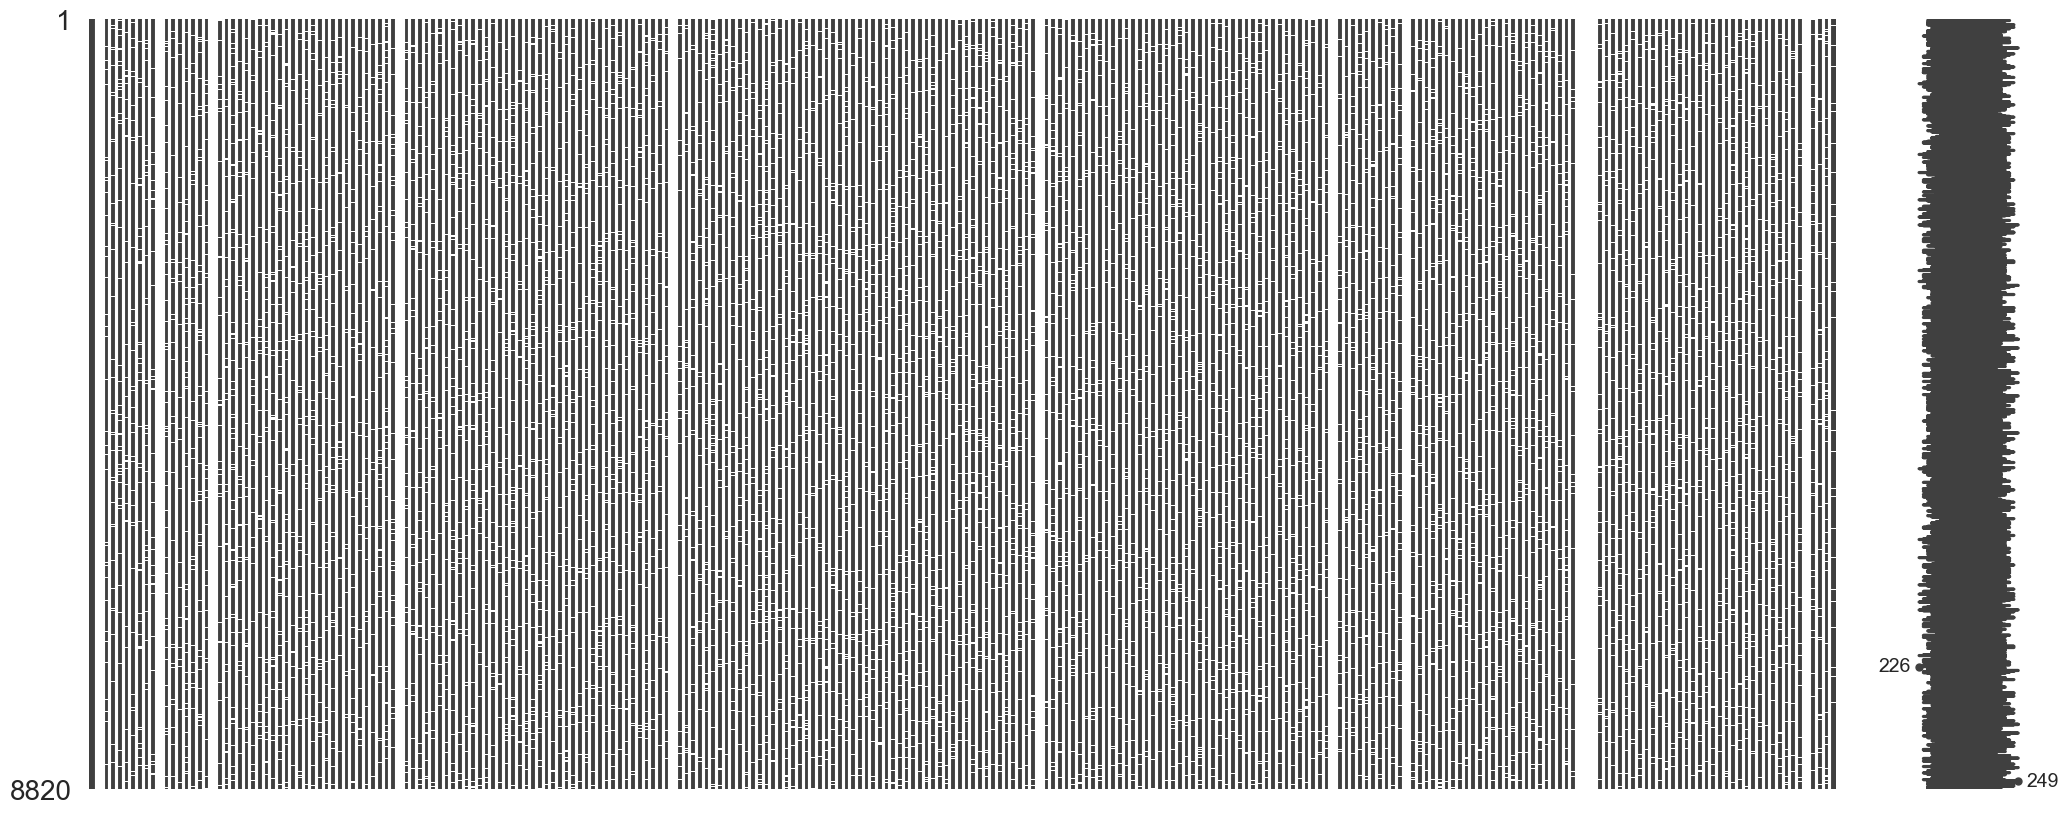

Unnamed: 0       0
2015-01-01    8820
2015-01-02       0
2015-01-05       0
2015-01-06       0
              ... 
2015-12-25    8820
2015-12-28       0
2015-12-29       0
2015-12-30       0
2015-12-31       0
Length: 262, dtype: int64

In [6]:
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize missing data
msno.matrix(df_horaires)
plt.show()

# Impute missing values
# For numerical columns, use median imputation
# Sélectionne toutes les colonnes qui sont des nombres (float ou int). .columns récupère juste les noms des colonnes.
numerical_columns = df_horaires.select_dtypes(include=['float64', 'int64']).columns
# Pour chaque colonne numérique, remplace les valeurs manquantes (NaN) par la médiane de cette colonne.
# Par exemple, si "age" a des NaN, ils sont remplacés par la médiane des âges.
df_horaires[numerical_columns] = df_horaires[numerical_columns].fillna(df_horaires[numerical_columns].median())

# For categorical columns, use mode 
# Sélectionne toutes les colonnes textes/catégories (object). .columns récupère juste les noms des colonnes.
categorical_columns = df_horaires.select_dtypes(include=['object']).columns
# Pour chaque colonne catégorique, remplace les NaN par le mode (la valeur la plus fréquente). Le .iloc[0] prend juste la première valeur du mode.
df_horaires[categorical_columns] = df_horaires[categorical_columns].fillna(df_horaires[categorical_columns].mode().iloc[0])

# Verify that there are no more missing values
df_horaires.isnull().sum()


In [11]:
# ----------------------------------------
# Graphique 1 : Histogramme des NA par colonne
# ----------------------------------------
ax1 = axes[0, 0]
if len(missing_data) > 0:
    colors = plt.cm.Reds(missing_data['Pourcentage_NA'] / 100)
    ax1.barh(missing_data['Colonne'], missing_data['Nombre_NA'], color=colors)
    ax1.set_xlabel('Nombre de valeurs manquantes', fontsize=12)
    ax1.set_title('Nombre de valeurs manquantes par colonne', fontsize=13, fontweight='bold')
    ax1.grid(axis='x', alpha=0.3)
    
    # Ajouter les valeurs sur les barres
    for i, (idx, row) in enumerate(missing_data.iterrows()):
        ax1.text(row['Nombre_NA'], i, f" {row['Nombre_NA']} ({row['Pourcentage_NA']:.1f}%)", 
                va='center', fontsize=10)
else:
    ax1.text(0.5, 0.5, '✅ Aucune valeur manquante', 
            ha='center', va='center', fontsize=14, transform=ax1.transAxes)
    ax1.set_title('Nombre de valeurs manquantes par colonne', fontsize=13, fontweight='bold')

# ----------------------------------------
# Graphique 2 : Pourcentage de NA par colonne
# ----------------------------------------
ax2 = axes[0, 1]
if len(missing_data) > 0:
    colors = plt.cm.Reds(missing_data['Pourcentage_NA'] / 100)
    ax2.barh(missing_data['Colonne'], missing_data['Pourcentage_NA'], color=colors)
    ax2.set_xlabel('Pourcentage de valeurs manquantes (%)', fontsize=12)
    ax2.set_title('Pourcentage de valeurs manquantes par colonne', fontsize=13, fontweight='bold')
    ax2.axvline(x=50, color='red', linestyle='--', linewidth=2, label='Seuil 50%')
    ax2.legend()
    ax2.grid(axis='x', alpha=0.3)
    
    # Ajouter les valeurs sur les barres
    for i, (idx, row) in enumerate(missing_data.iterrows()):
        ax2.text(row['Pourcentage_NA'], i, f" {row['Pourcentage_NA']:.1f}%", 
                va='center', fontsize=10)
else:
    ax2.text(0.5, 0.5, '✅ Aucune valeur manquante', 
            ha='center', va='center', fontsize=14, transform=ax2.transAxes)
    ax2.set_title('Pourcentage de valeurs manquantes par colonne', fontsize=13, fontweight='bold')

# ----------------------------------------
# Graphique 3 : Heatmap des valeurs manquantes
# ----------------------------------------
ax3 = axes[1, 0]
# Créer une matrice binaire (1 = manquant, 0 = présent)
# Limiter à 100 lignes pour la lisibilité
sample_size = min(100, len(df_horaires))
missing_matrix = df_horaires.head(sample_size).isnull().astype(int)

if missing_matrix.sum().sum() > 0:
    sns.heatmap(missing_matrix.T, cmap='RdYlGn_r', cbar=True, 
                yticklabels=df_horaires.columns, xticklabels=False, ax=ax3)
    ax3.set_title(f'Heatmap des valeurs manquantes (échantillon: {sample_size} lignes)', 
                 fontsize=13, fontweight='bold')
    ax3.set_xlabel('Index des lignes', fontsize=12)
    ax3.set_ylabel('Colonnes', fontsize=12)
else:
    ax3.text(0.5, 0.5, '✅ Aucune valeur manquante', 
            ha='center', va='center', fontsize=14, transform=ax3.transAxes)
    ax3.set_title(f'Heatmap des valeurs manquantes (échantillon: {sample_size} lignes)', 
                 fontsize=13, fontweight='bold')

# ----------------------------------------
# Graphique 4 : Histogramme du taux de complétude par ligne
# ----------------------------------------
ax4 = axes[1, 1]
# Calculer le taux de complétude par ligne (% de valeurs non-manquantes)
completeness_per_row = (1 - df_horaires.isnull().sum(axis=1) / len(df_horaires.columns)) * 100

ax4.hist(completeness_per_row, bins=30, color='steelblue', edgecolor='black', alpha=0.7)
ax4.set_xlabel('Taux de complétude par ligne (%)', fontsize=12)
ax4.set_ylabel('Nombre de lignes', fontsize=12)
ax4.set_title('Distribution du taux de complétude par ligne', fontsize=13, fontweight='bold')
ax4.axvline(x=completeness_per_row.mean(), color='red', linestyle='--', 
           linewidth=2, label=f'Moyenne: {completeness_per_row.mean():.1f}%')
ax4.legend()
ax4.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# ========================================
# 6. ANALYSE PAR EMPLOYÉ
# ========================================

print("\n" + "=" * 60)
print("ANALYSE DES VALEURS MANQUANTES PAR EMPLOYÉ")
print("=" * 60)

# Supposons qu'il y a une colonne 'EmployeeID' (ajuste selon tes données)
if 'EmployeeID' in df_horaires.columns:
    # Calculer les NA par employé
    na_per_employee = df_horaires.groupby('EmployeeID').apply(
        lambda x: x.isnull().sum().sum()
    ).sort_values(ascending=False)
    
    print(f"\n🔍 Top 10 employés avec le plus de valeurs manquantes :")
    print(na_per_employee.head(10))
    
    # Visualisation
    fig, ax = plt.subplots(figsize=(14, 6))
    top_n = 20
    na_per_employee.head(top_n).plot(kind='bar', color='coral', ax=ax)
    ax.set_title(f'Top {top_n} employés avec le plus de valeurs manquantes', 
                fontsize=14, fontweight='bold')
    ax.set_xlabel('EmployeeID', fontsize=12)
    ax.set_ylabel('Nombre de valeurs manquantes', fontsize=12)
    ax.grid(axis='y', alpha=0.3)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    
    # Statistiques
    print(f"\n📊 Statistiques sur les NA par employé :")
    print(f"   Moyenne : {na_per_employee.mean():.2f} NA/employé")
    print(f"   Médiane : {na_per_employee.median():.2f} NA/employé")
    print(f"   Maximum : {na_per_employee.max()} NA")
    print(f"   Employés sans aucune NA : {(na_per_employee == 0).sum()}")
else:
    print("⚠️  Colonne 'EmployeeID' non trouvée. Ajuste le nom de la colonne.")

# ========================================
# 7. ANALYSE TEMPORELLE (si dates présentes)
# ========================================

print("\n" + "=" * 60)
print("ANALYSE TEMPORELLE DES VALEURS MANQUANTES")
print("=" * 60)

# Chercher une colonne de date
date_columns = [col for col in df_horaires.columns if 'date' in col.lower()]

if date_columns:
    date_col = date_columns[0]
    print(f"\n📅 Colonne de date détectée : '{date_col}'")
    
    # Convertir en datetime
    df_horaires[date_col] = pd.to_datetime(df_horaires[date_col], errors='coerce')
    
    # Compter les NA par date
    na_per_date = df_horaires.groupby(date_col).apply(
        lambda x: x.isnull().sum().sum()
    ).sort_index()
    
    # Visualisation
    fig, ax = plt.subplots(figsize=(14, 6))
    na_per_date.plot(kind='line', marker='o', color='crimson', ax=ax)
    ax.set_title('Évolution des valeurs manquantes dans le temps', 
                fontsize=14, fontweight='bold')
    ax.set_xlabel('Date', fontsize=12)
    ax.set_ylabel('Nombre de valeurs manquantes', fontsize=12)
    ax.grid(alpha=0.3)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    
    # Identifier les dates problématiques
    threshold = na_per_date.quantile(0.9)  # Top 10% des dates avec le plus de NA
    dates_problematiques = na_per_date[na_per_date > threshold]
    
    if len(dates_problematiques) > 0:
        print(f"\n⚠️  Dates avec un nombre anormalement élevé de NA (>{threshold:.0f}):")
        print(dates_problematiques)
else:
    print("⚠️  Aucune colonne de date détectée.")

# ========================================
# 8. RÉSUMÉ FINAL
# ========================================

print("\n" + "=" * 60)
print("RÉSUMÉ DE L'ANALYSE")
print("=" * 60)

total_cells = df_horaires.shape[0] * df_horaires.shape[1]
total_missing = df_horaires.isnull().sum().sum()
missing_percentage = (total_missing / total_cells) * 100

print(f"\n📊 Dataset complet :")
print(f"   • Lignes : {df_horaires.shape[0]:,}")
print(f"   • Colonnes : {df_horaires.shape[1]}")
print(f"   • Cellules totales : {total_cells:,}")
print(f"\n❌ Valeurs manquantes :")
print(f"   • Total : {total_missing:,} ({missing_percentage:.2f}%)")
print(f"   • Colonnes affectées : {len(missing_data)}/{len(df_horaires.columns)}")

if len(missing_data) > 0:
    worst_col = missing_data.iloc[0]
    print(f"   • Colonne la plus touchée : '{worst_col['Colonne']}' ({worst_col['Pourcentage_NA']:.1f}%)")

print("\n✅ Analyse terminée !")

# ========================================
# 9. SAUVEGARDE DU RAPPORT (OPTIONNEL)
# ========================================

# Sauvegarder le résumé dans un CSV
missing_data.to_csv('rapport_valeurs_manquantes_horaires.csv', index=False)
print("\n💾 Rapport sauvegardé : 'rapport_valeurs_manquantes_horaires.csv'")

<Figure size 1200x900 with 0 Axes>


ANALYSE DES VALEURS MANQUANTES PAR EMPLOYÉ
⚠️  Colonne 'EmployeeID' non trouvée. Ajuste le nom de la colonne.

ANALYSE TEMPORELLE DES VALEURS MANQUANTES
⚠️  Aucune colonne de date détectée.

RÉSUMÉ DE L'ANALYSE

📊 Dataset complet :
   • Lignes : 8,820
   • Colonnes : 262
   • Cellules totales : 2,310,840

❌ Valeurs manquantes :
   • Total : 218,160 (9.44%)
   • Colonnes affectées : 261/262
   • Colonne la plus touchée : '2015-01-01' (100.0%)

✅ Analyse terminée !

💾 Rapport sauvegardé : 'rapport_valeurs_manquantes_horaires.csv'
